In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')

# Display top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Check basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Confirm conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Summary statistics
df.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [6]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"🏆 Total Profit: ${total_profit:,.2f}")
print(f"🎯 Average Discount: {avg_discount:.2%}")


💰 Total Sales: $2,297,200.86
🏆 Total Profit: $286,397.02
🎯 Average Discount: 15.62%


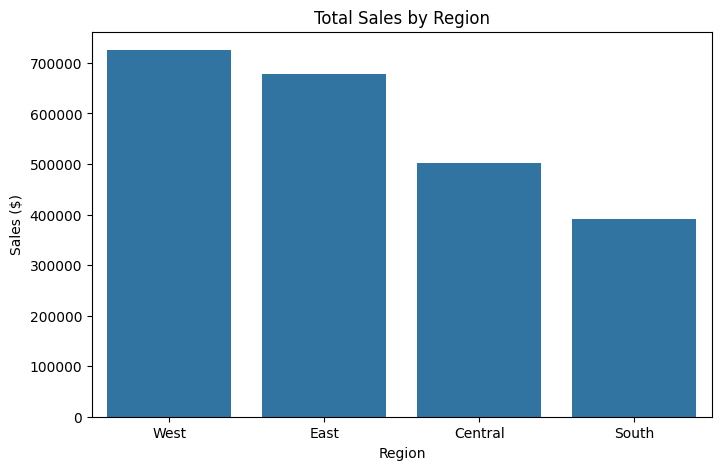

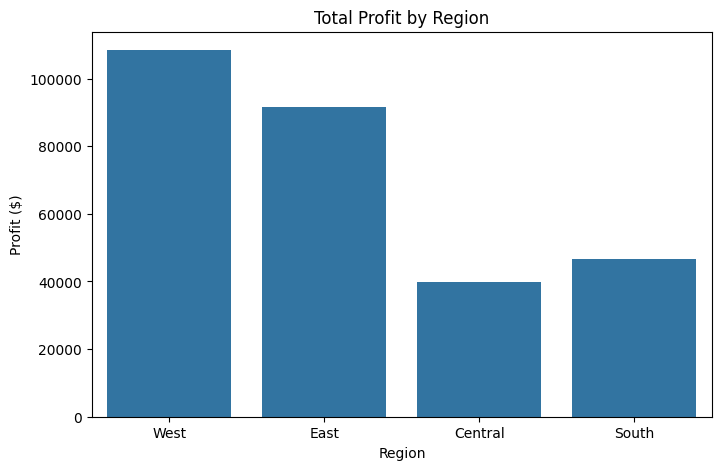

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_summary.index, y=region_summary['Sales'])
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.xlabel('Region')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=region_summary.index, y=region_summary['Profit'])
plt.title('Total Profit by Region')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.show()

region_summary


In [8]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_summary


,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


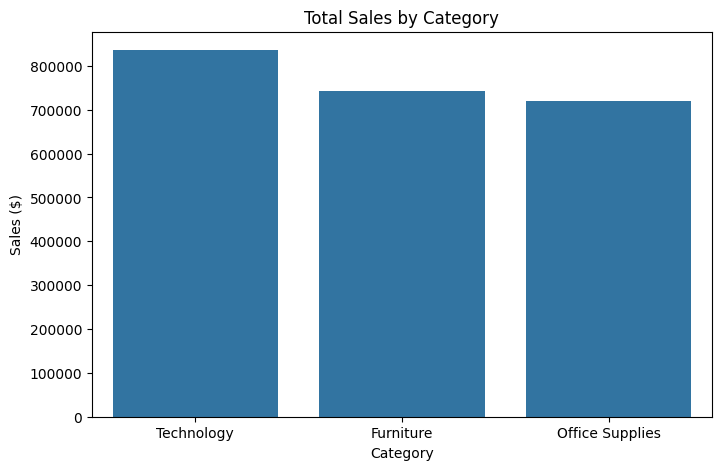

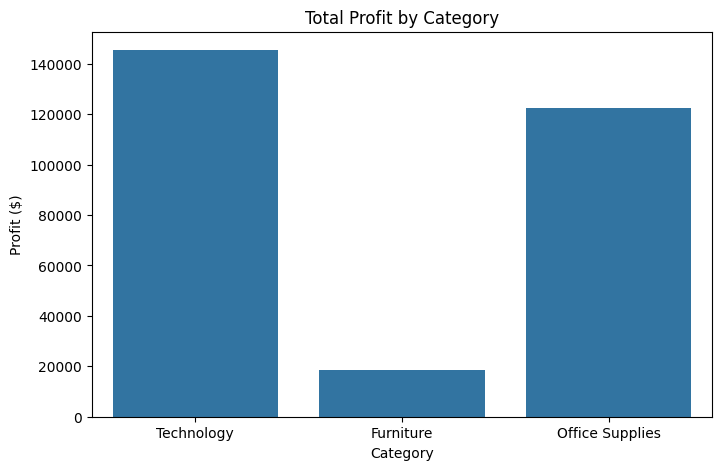

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_summary.index, y=category_summary['Sales'])
plt.title('Total Sales by Category')
plt.ylabel('Sales ($)')
plt.xlabel('Category')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=category_summary.index, y=category_summary['Profit'])
plt.title('Total Profit by Category')
plt.ylabel('Profit ($)')
plt.xlabel('Category')
plt.show()


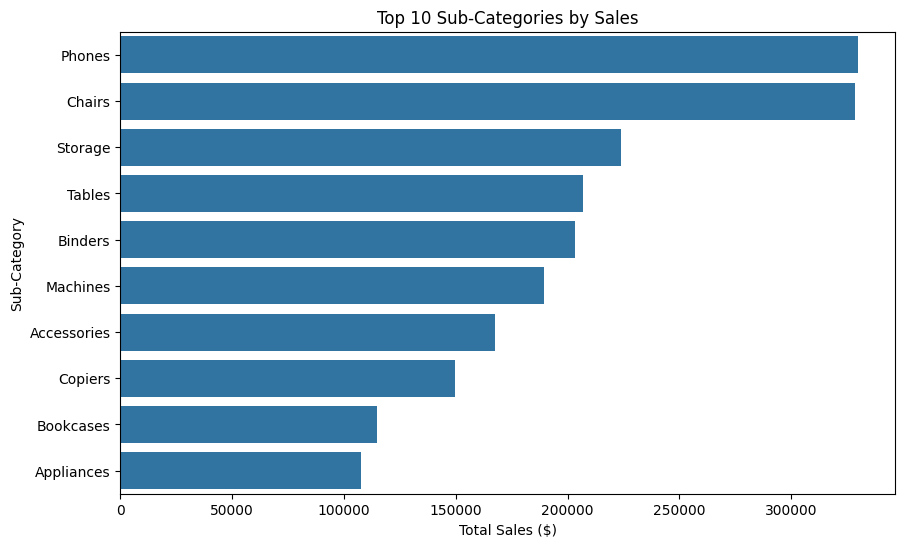

In [10]:
top_subcats = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_subcats.values, y=top_subcats.index)
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Sub-Category')
plt.show()


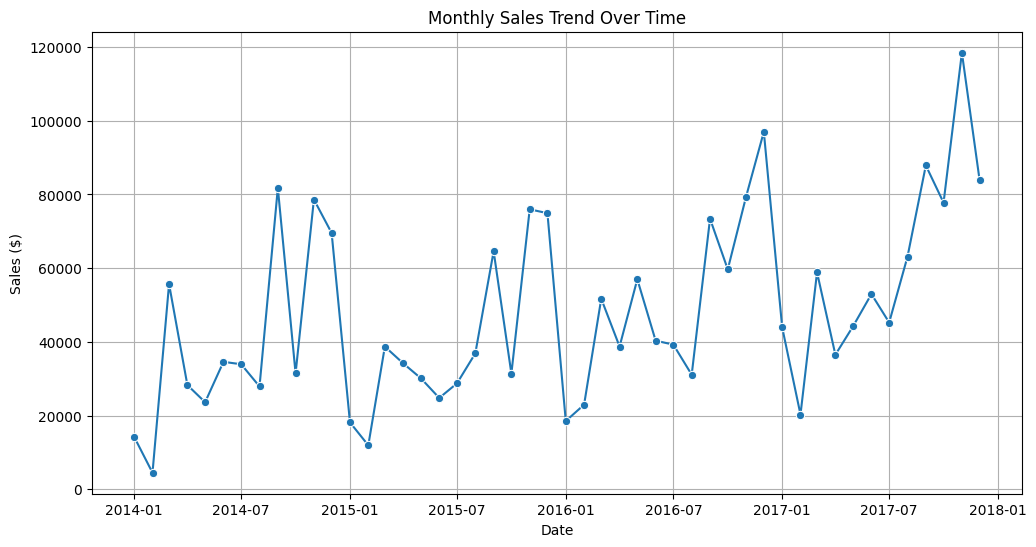

In [11]:
# Extract month and year from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by year-month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a date column for plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Plot sales trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()


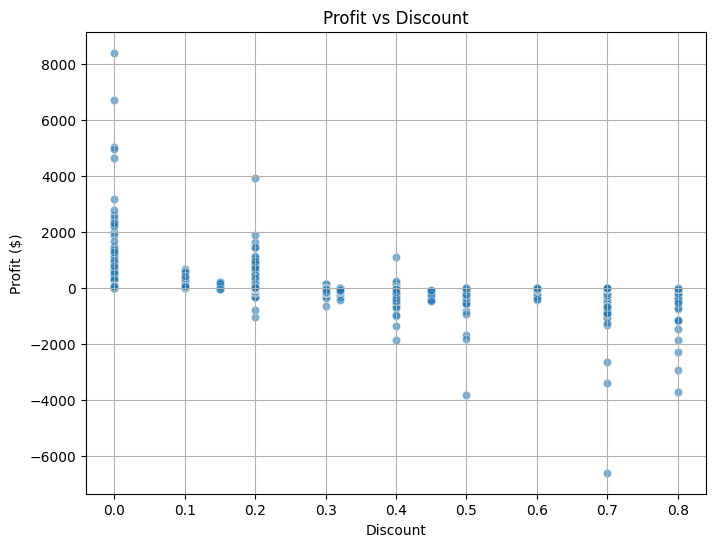

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()
